# Salt-and-Pepper noise removal
In this notebook all the mentioned filters in my thesis along with the proposed K-SVD algorithm are applied to an MR image with different levels of noise.

In [19]:
from src.Filters.Adaptive_Median import *
from src.Filters.Adaptive_Wiener import *
from src.Filters.KSVD_Bilateral import *
import cv2 as cv
import matplotlib.pyplot as plt
from src.functions import *
from scipy.signal import wiener

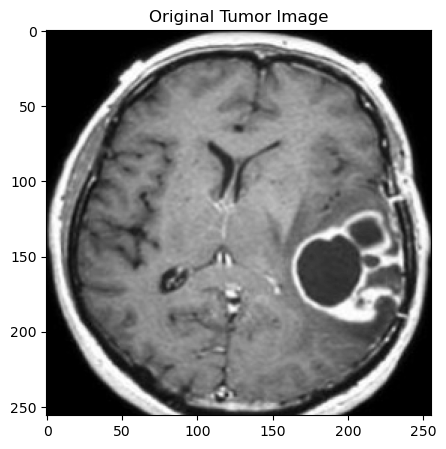

In [3]:
original_tumor_img = cv.imread("src/Images/Tumor_Brain.jpg", cv.IMREAD_GRAYSCALE)
imshow(original_tumor_img, "Original Tumor Image")

Now that we have our original image, let's add salt-and-pepper noise with different densities to it.

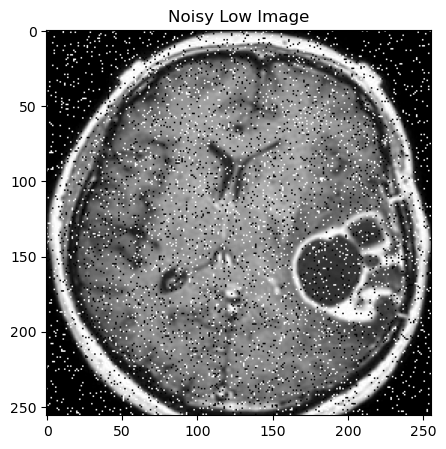

In [4]:
noisy_low = add_salt_and_pepper_noise(original_tumor_img, salt_prob=0.05, pepper_prob=0.05)
imshow(noisy_low, "Noisy Low Image")

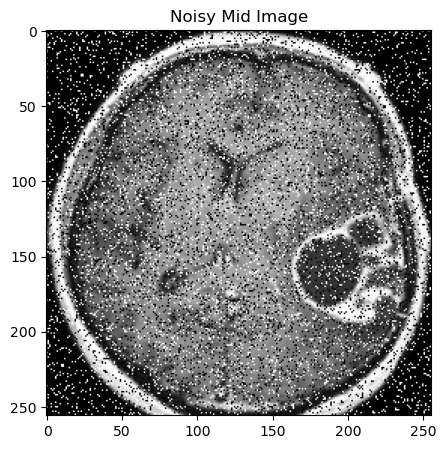

In [5]:
noisy_mid = add_salt_and_pepper_noise(original_tumor_img, salt_prob=0.1, pepper_prob=0.1)
imshow(noisy_mid, "Noisy Mid Image")

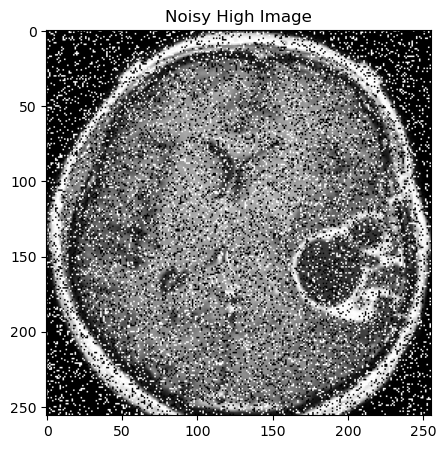

In [30]:
noisy_high = add_salt_and_pepper_noise(original_tumor_img, salt_prob=0.15, pepper_prob=0.15)
imshow(noisy_high, "Noisy High Image")

## 1. Median Filter
In this section, we apply the median filter to the noisy image with different levels of noise.

In [7]:
restored_median_low = cv.medianBlur(noisy_low, 3)
psnr_median_low = calculate_psnr(original_tumor_img, restored_median_low)

In [8]:
restored_median_mid = cv.medianBlur(noisy_mid, 3)
psnr_median_mid = calculate_psnr(original_tumor_img, restored_median_mid)

In [31]:
restored_median_high = cv.medianBlur(noisy_high, 3)
psnr_median_high = calculate_psnr(original_tumor_img, restored_median_high)

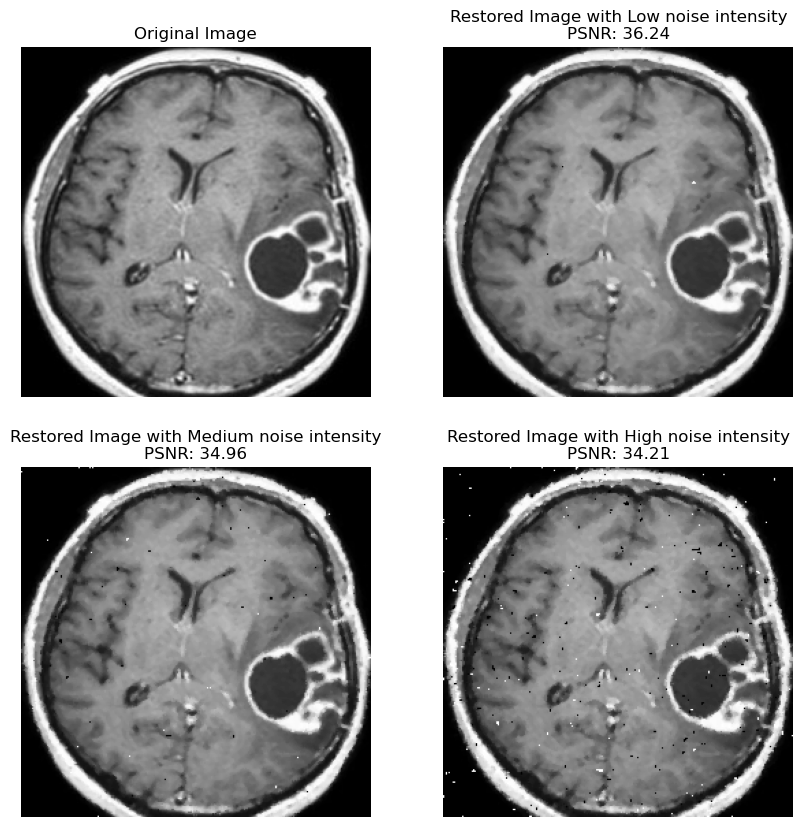

In [32]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(original_tumor_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(restored_median_low, cmap='gray')
plt.title('Restored Image with Low noise intensity\nPSNR: {:.2f}'.format(psnr_median_low))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(restored_median_mid, cmap='gray')
plt.title('Restored Image with Medium noise intensity\nPSNR: {:.2f}'.format(psnr_median_mid))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(restored_median_high, cmap='gray')
plt.title('Restored Image with High noise intensity\nPSNR: {:.2f}'.format(psnr_median_high))
plt.axis('off')

plt.show()

As we can see, the median filter has blurred the image and removed the noise. However, the edges are not preserved.

## 2. Adaptive Median Filter
In this section, we apply the adaptive median filter to the noisy image with different levels of noise.

In [11]:
restored_adapmedian_low = adaptive_median_filter(noisy_low, 3, 11)
psnr_adapmedian_low = calculate_psnr(original_tumor_img, restored_adapmedian_low)

In [12]:
restored_adapmedian_mid = adaptive_median_filter(noisy_mid, 3, 11)
psnr_adapmedian_mid = calculate_psnr(original_tumor_img, restored_adapmedian_mid)

In [33]:
restored_adapmedian_high = adaptive_median_filter(noisy_high, 3, 11)
psnr_adapmedian_high = calculate_psnr(original_tumor_img, restored_adapmedian_high)

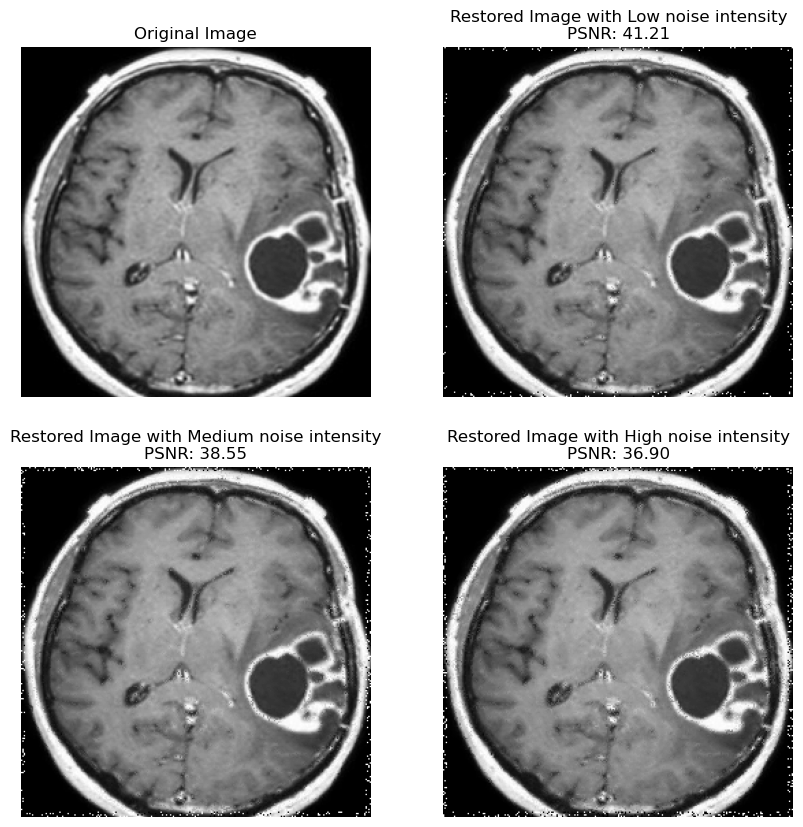

In [14]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(original_tumor_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(restored_adapmedian_low, cmap='gray')
plt.title('Restored Image with Low noise intensity\nPSNR: {:.2f}'.format(psnr_adapmedian_low))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(restored_adapmedian_mid, cmap='gray')
plt.title('Restored Image with Medium noise intensity\nPSNR: {:.2f}'.format(psnr_adapmedian_mid))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(restored_adapmedian_high, cmap='gray')
plt.title('Restored Image with High noise intensity\nPSNR: {:.2f}'.format(psnr_adapmedian_high))
plt.axis('off')

plt.show()

As expected, the adaptive median filter has removed the noise but with better efficiency than standard median filter.

## 3.Wiener Filter
In this section, we apply the Wiener filter to the noisy image with different levels of noise.

In [15]:
restored_wiener_low = wiener(noisy_low, (original_tumor_img.shape[0], original_tumor_img.shape[1]))
psnr_wiener_low = calculate_psnr(original_tumor_img, restored_wiener_low)

In [16]:
restored_wiener_mid = wiener(noisy_mid, (original_tumor_img.shape[0], original_tumor_img.shape[1]))
psnr_wiener_mid = calculate_psnr(original_tumor_img, restored_wiener_mid)

In [34]:
restored_wiener_high = wiener(noisy_high, (original_tumor_img.shape[0], original_tumor_img.shape[1]))
psnr_wiener_high = calculate_psnr(original_tumor_img, restored_wiener_high)

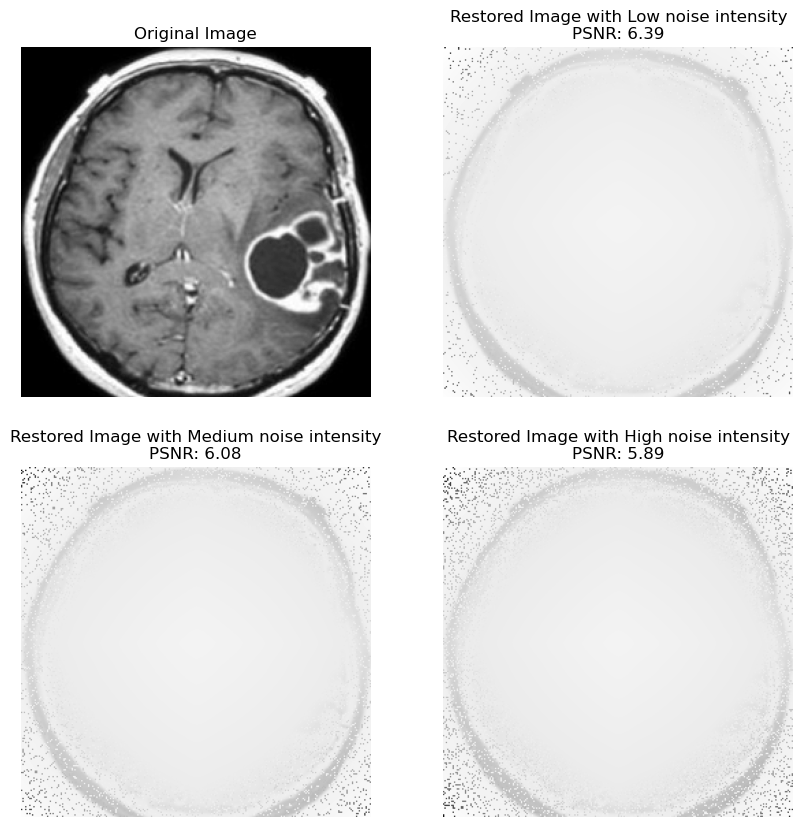

In [18]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(original_tumor_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(restored_wiener_low, cmap='gray')
plt.title('Restored Image with Low noise intensity\nPSNR: {:.2f}'.format(psnr_wiener_low))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(restored_wiener_mid, cmap='gray')
plt.title('Restored Image with Medium noise intensity\nPSNR: {:.2f}'.format(psnr_wiener_mid))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(restored_wiener_high, cmap='gray')
plt.title('Restored Image with High noise intensity\nPSNR: {:.2f}'.format(psnr_wiener_high))
plt.axis('off')

plt.show()

Because the Wiener filter is a linear filter, it is not effective in removing noise, since it does not take into account the non-linear nature of the noise.

## 4. Adaptive Wiener Filter
In this section, we apply the adaptive Wiener filter to the noisy image with different levels of noise.

In [20]:
restored_adapwiener_low = adaptive_wiener_filter(noisy_low)
psnr_adapwiener_low = calculate_psnr(original_tumor_img, restored_adapwiener_low)

In [21]:
restored_adapwiener_mid = adaptive_wiener_filter(noisy_mid)
psnr_adapwiener_mid = calculate_psnr(original_tumor_img, restored_adapwiener_mid)

In [35]:
restored_adapwiener_high = adaptive_wiener_filter(noisy_high)
psnr_adapwiener_high = calculate_psnr(original_tumor_img, restored_adapwiener_high)

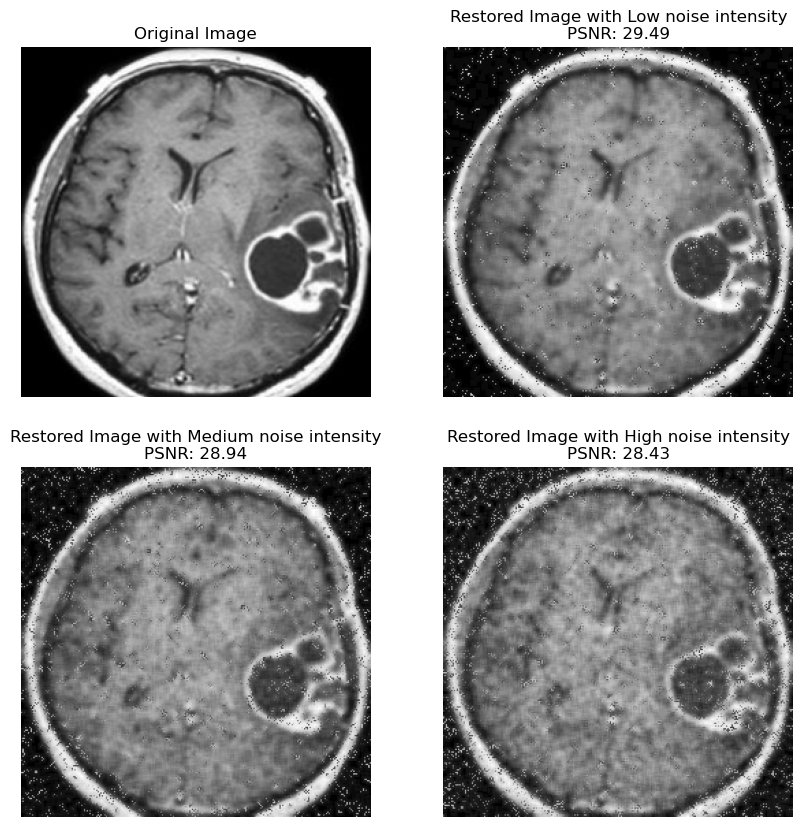

In [23]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(original_tumor_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(restored_adapwiener_low, cmap='gray')
plt.title('Restored Image with Low noise intensity\nPSNR: {:.2f}'.format(psnr_adapwiener_low))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(restored_adapwiener_mid, cmap='gray')
plt.title('Restored Image with Medium noise intensity\nPSNR: {:.2f}'.format(psnr_adapwiener_mid))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(restored_adapwiener_high, cmap='gray')
plt.title('Restored Image with High noise intensity\nPSNR: {:.2f}'.format(psnr_adapwiener_high))
plt.axis('off')

plt.show()

By comparing the results of wiener filter with adaptive wieiner filter, we can see that the adaptive wiener filter is more effective in removing noise than the wiener filter. This is because the adaptive wiener filter is able to adapt to the noise level in the image.

## 5. Bilateral Filter
In this section, we apply the bilateral filter to the noisy image with different levels of noise.

In [24]:
restored_bilateral_low = cv.bilateralFilter(noisy_low, 9, 75, 75)
psnr_bilateral_low = calculate_psnr(original_tumor_img, restored_bilateral_low)

In [25]:
restored_bilateral_mid = cv.bilateralFilter(noisy_mid, 9, 75, 75)
psnr_bilateral_mid = calculate_psnr(original_tumor_img, restored_bilateral_mid)

In [36]:
restored_bilateral_high = cv.bilateralFilter(noisy_high, 9, 75, 75)
psnr_bilateral_high = calculate_psnr(original_tumor_img, restored_bilateral_high)

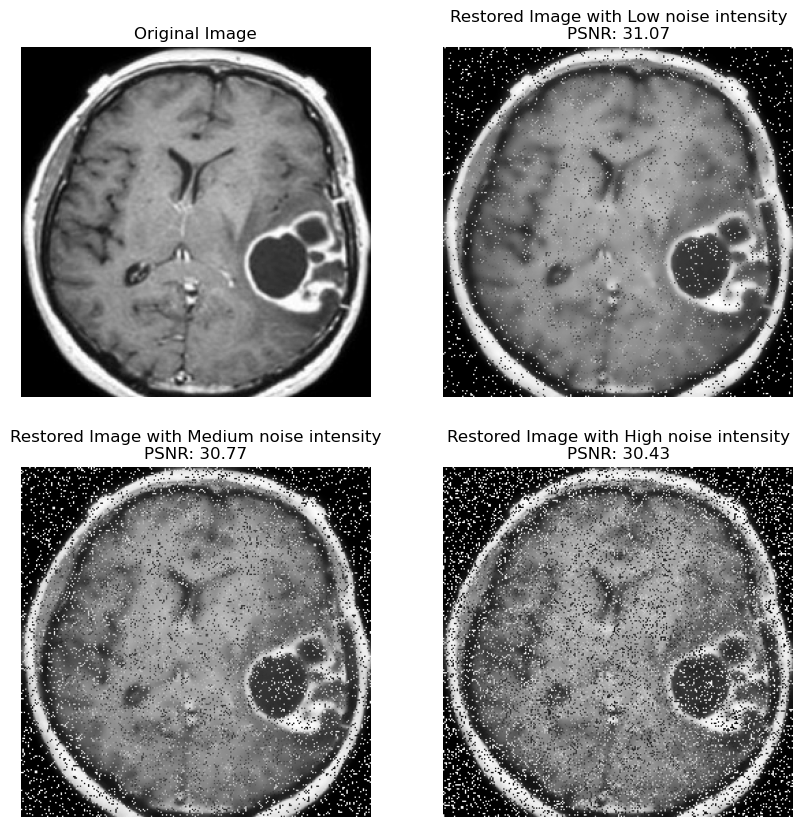

In [27]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(original_tumor_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(restored_bilateral_low, cmap='gray')
plt.title('Restored Image with Low noise intensity\nPSNR: {:.2f}'.format(psnr_bilateral_low))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(restored_bilateral_mid, cmap='gray')
plt.title('Restored Image with Medium noise intensity\nPSNR: {:.2f}'.format(psnr_bilateral_mid))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(restored_bilateral_high, cmap='gray')
plt.title('Restored Image with High noise intensity\nPSNR: {:.2f}'.format(psnr_bilateral_high))
plt.axis('off')

plt.show()

As we can see, the bilateral filter is not as effective as the adaptive median filter in removing noise. This is because the bilateral filter is not able to adapt to the noise level in the image.

## 6. proposed K-SVD Algorithm
In this section, we apply the proposed K-SVD algorithm to the noisy image with different levels of noise.

In [39]:
edge_layer_low, residual_layer_low = bilateral_filter_decomposition(noisy_low)
denoised_residual_low = k_svd_denoising(residual_layer_low, patch_size=16, n_components=25, max_iter=2)
restored_ksvd_low = merge_layers(edge_layer_low, denoised_residual_low)
psnr_ksvd_low = calculate_psnr(original_tumor_img, restored_ksvd_low)

In [40]:
edge_layer_mid, residual_layer_mid = bilateral_filter_decomposition(noisy_mid)
denoised_residual_mid = k_svd_denoising(residual_layer_mid, patch_size=16, n_components=25, max_iter=2)
restored_ksvd_mid = merge_layers(edge_layer_mid, denoised_residual_mid)
psnr_ksvd_mid = calculate_psnr(original_tumor_img, restored_ksvd_mid)

In [41]:
edge_layer_high, residual_layer_high = bilateral_filter_decomposition(noisy_high)
denoised_residual_high = k_svd_denoising(residual_layer_high, patch_size=16, n_components=25, max_iter=2)
restored_ksvd_high = merge_layers(edge_layer_high, denoised_residual_high)
psnr_ksvd_high = calculate_psnr(original_tumor_img, restored_ksvd_high)

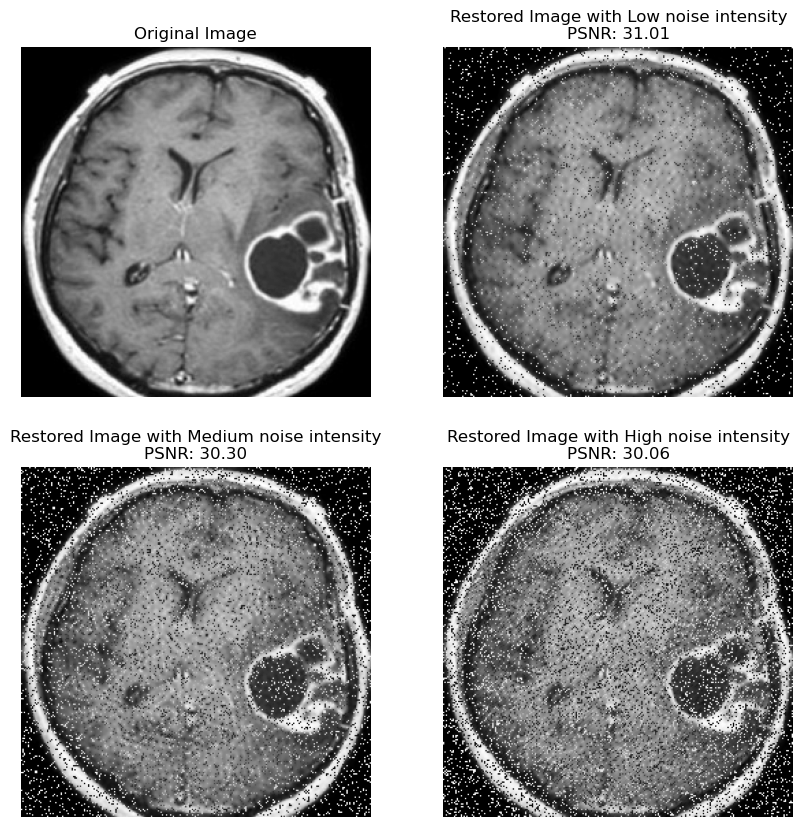

In [42]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(original_tumor_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(restored_ksvd_low, cmap='gray')
plt.title('Restored Image with Low noise intensity\nPSNR: {:.2f}'.format(psnr_ksvd_low))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(restored_ksvd_mid, cmap='gray')
plt.title('Restored Image with Medium noise intensity\nPSNR: {:.2f}'.format(psnr_ksvd_mid))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(restored_ksvd_high, cmap='gray')
plt.title('Restored Image with High noise intensity\nPSNR: {:.2f}'.format(psnr_ksvd_high))
plt.axis('off')

plt.show()